In [99]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [100]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
import random
import scipy
import scipy.stats

In [101]:
file='./formationchannels.npy'
data=np.load(file)

In [102]:
data

array([[17.12172682],
       [ 5.94121793],
       [ 6.35914124],
       ...,
       [34.34170191],
       [30.27018478],
       [25.93264098]])

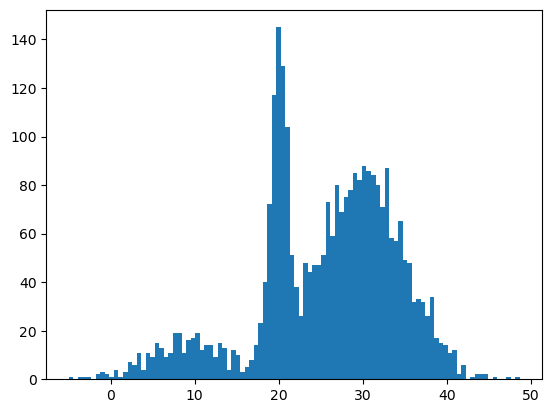

In [103]:
histo=plt.hist(data,bins=100)
plt.show()

In [126]:
gmm=sklearn.mixture.GaussianMixture(n_components=3, covariance_type='full')

In [127]:
fit=gmm.fit(data)
#plt.hist(data,bins=100)
#plt.show()
print(fit)

GaussianMixture(n_components=3)


In [128]:
prob=gmm.predict_proba(data)
#fit.means_()
#fit.covariances_()

In [129]:
fit.means_

array([[20.0514007 ],
       [30.12190626],
       [ 9.09334831]])

In [130]:
fit.covariances_

array([[[ 1.1343104 ]],

       [[24.13157436]],

       [[21.80750087]]])

In [131]:
gmm.score(data)

-3.401216251571534

In [95]:
np.exp(gmm.score(data))

0.03333195142128791

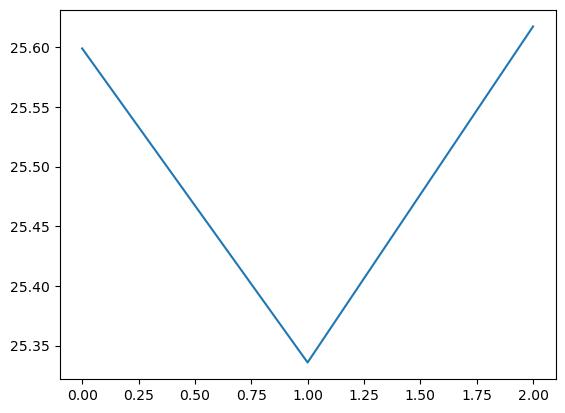

In [66]:
plt.plot(fit.means_)

In [71]:
#plt.plot(fit.covariances_)

In [136]:
x=np.linspace(0,50,2950)
log_prob = gmm.score_samples(data)
pdf = np.exp(log_prob)

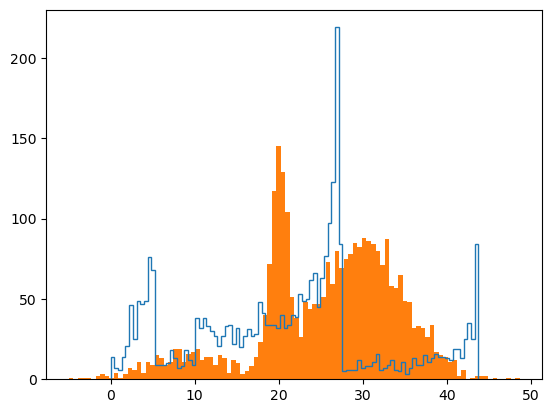

In [156]:
plt.hist(pdf*500, bins=100, histtype='step')
plt.hist(data,bins=100)
plt.show()

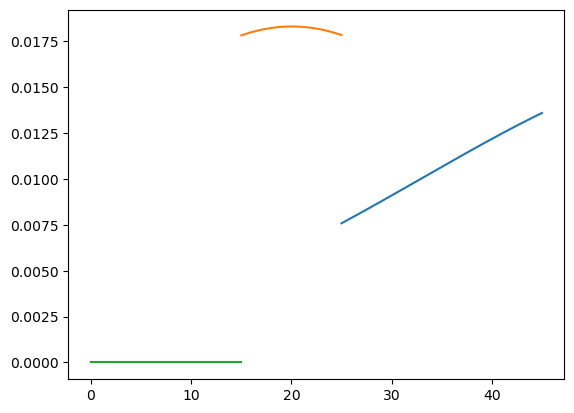

In [114]:
#definition of gaussian
def gauss(x,m,s):
    return 1/(s*np.sqrt(2*np.pi))*np.exp(-(x-m)**2/(2*s**2))

x1=np.linspace(0,15,1000)
x2=np.linspace(15,25,1000)
x3=np.linspace(25,45,1000)

plt.plot(x3,gauss(x1,30.12430964,24.11386033))
plt.plot(x2,gauss(x2,20.05198472,21.79683296))
plt.plot(x1,gauss(x3,9.09213997,1.13730617))
plt.show()

TypeError: _parse_args() got multiple values for argument 'loc'

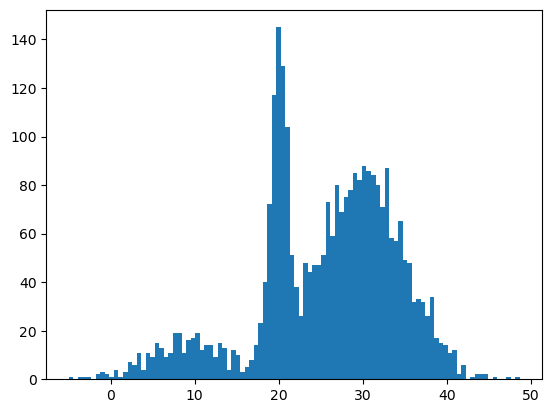

In [98]:
plt.hist(data,bins=100)
#plt.plot(fit.means_[0],scipy.stats.norm(loc=fit.means_[0],scale=fit.covariances_[0][0]))
#plt.plot(fit.means_)
#plt.plot(fit.covariances_)
x=np.linspace(0,15,1000)
y=scipy.stats.norm(x,loc=30.12430964,scale=24.11386033)
plt.plot(x,)
plt.show()

In [157]:
# Parameters for the two Gaussian distributions
mean1, mean2 = 2.0, 8.0  # Means
std_dev1, std_dev2 = 1.5, 1.0  # Standard deviations
size1, size2 = 300, 200  # Number of samples

# Generate data
gaussian1 = np.random.normal(mean1, std_dev1, size1)
gaussian2 = np.random.normal(mean2, std_dev2, size2)

# Combine both distributions
data = np.concatenate([gaussian1, gaussian2]).reshape(-1, 1)


In [160]:
gmm = sklearn.mixture.GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)


GaussianMixture(n_components=2, random_state=42)

In [161]:
print("Means:", gmm.means_.flatten())
print("Weights:", gmm.weights_)
print("Covariances:", gmm.covariances_.flatten())


Means: [1.92725098 8.06157065]
Weights: [0.59288696 0.40711304]
Covariances: [1.98303354 1.01881902]


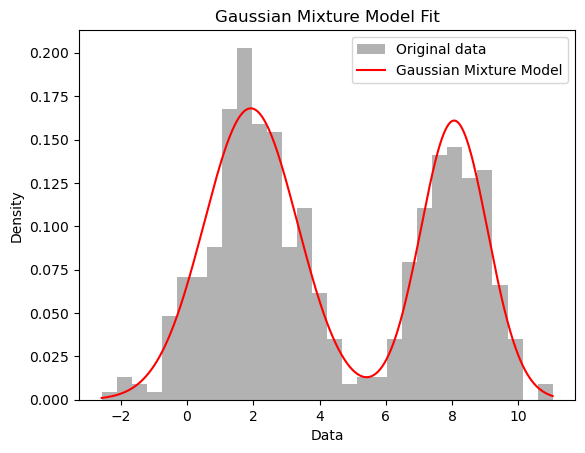

In [162]:
# Predicted probabilities
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
log_prob = gmm.score_samples(x)
pdf = np.exp(log_prob)

# Plot
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', label="Original data")
plt.plot(x, pdf, label="Gaussian Mixture Model", color='red')
plt.legend()
plt.xlabel("Data")
plt.ylabel("Density")
plt.title("Gaussian Mixture Model Fit")
plt.show()
